In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob

In [3]:
training_files = glob.glob('../Gravitational_Wave_data/train_extracted/*/*/*/*')
training_files

['../Gravitational_Wave_data/train_extracted\\0\\0\\0\\00000e74ad.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\00001f4945.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0000661522.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\00007a006a.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0000a38978.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0000bb9f3e.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0000c3b9c9.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0000d61b7b.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0001016d12.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\00010beb4a.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\000118b40d.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\0001388506.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\00014b7a9d.npy',
 '../Gravitational_Wave_data/train_extracted\\0\\0\\0\\000161624

In [4]:
# Total number of training files
len(training_files)

560000

In [6]:
# Example of training data
data = np.load(training_files[0])
data

array([[-5.94830548e-21, -5.84995448e-21, -5.42415169e-21, ...,
        -6.06698987e-21, -5.96345722e-21, -5.75778438e-21],
       [ 9.75407048e-22,  4.52586118e-22,  4.58643893e-23, ...,
        -1.09608208e-20, -1.09766636e-20, -1.10858129e-20],
       [-1.74871983e-21, -1.18286791e-21, -1.93223777e-21, ...,
         1.46502268e-21,  2.18644864e-21,  1.54085934e-21]])

In [8]:
# Each dataset has 3 columns corresponds to 3 detectors (LIGO Hanford, LIGO Livingston, and Virgo)
len(data)

3

In [9]:
len(data[0])

4096

In [24]:
labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo'] 

In [26]:
'''Each data sample (npy file) contains 3 time series 
(1 for each detector) and each spans 2 sec and 
is sampled at 2,048 Hz'''
sam_rate = 2048
time = [i/2048 for i in range(len(data[0]))]

<IPython.core.display.Javascript object>


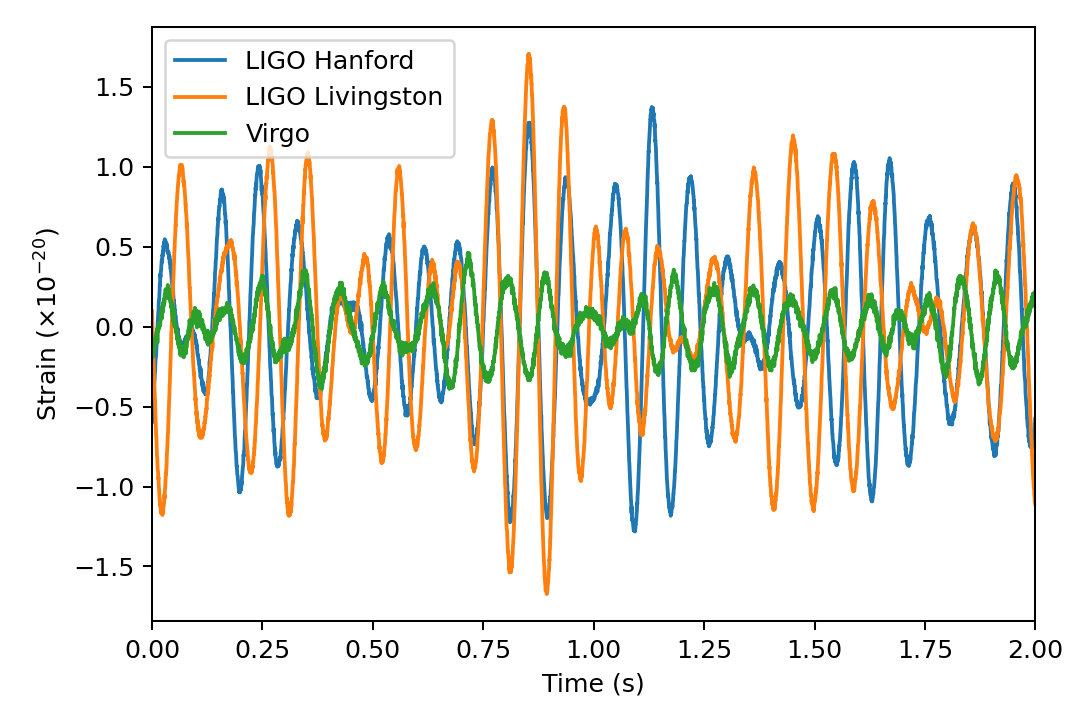

In [34]:
# Visualize data
%matplotlib notebook
plt.figure(figsize = (6,4))
for i in range(3):
    plt.plot(time, data[i]*10**(20), label = labels[i])
plt.xlabel('Time (s)')
plt.ylabel(r'Strain ($\times 10^{-20}$)')
plt.xlim(0, 2)
plt.legend()
plt.tight_layout()

In [35]:
training_labels = pd.read_csv('training_labels.csv') 

In [37]:
training_labels.shape

(560000, 2)

In [38]:
training_labels.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


In [45]:
# Check to see if our files has the right labels
n = 100
training_files[n].split('\\')[-1][:-4]

'000a852fee'

In [46]:
training_labels.iloc[n, 0]

'000a852fee'

<IPython.core.display.Javascript object>


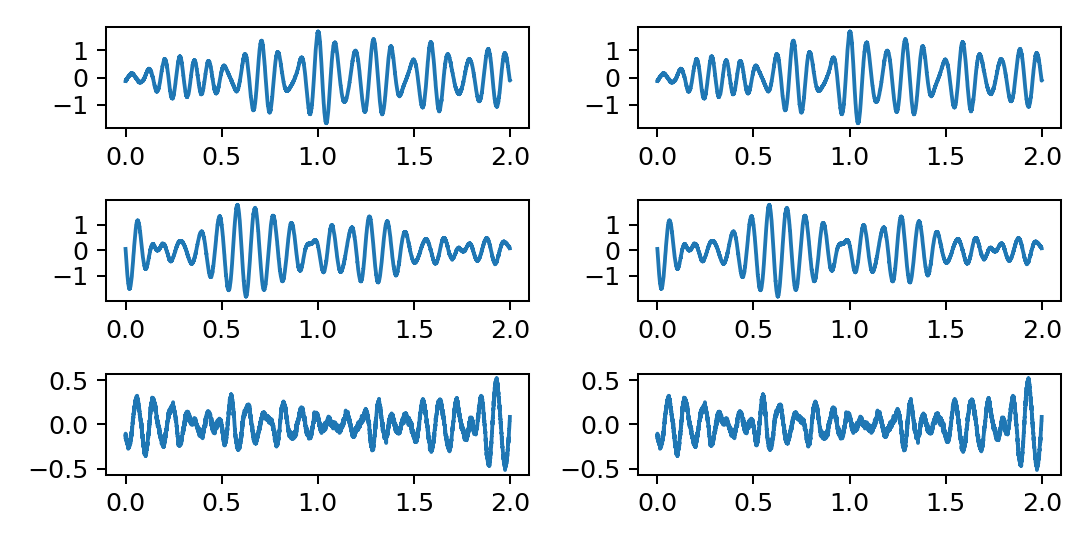

In [51]:
# visualize two sets of data, 
# one with gravitational wave signature and the other without
%matplotlib notebook
fig, ax = plt.subplots(3,2,figsize=(6,3))

a, b = 1, 0
data = np.load(training_files[a]) 
for i in range(3):
    ax[i,a].plot(time, data[i]*10**(20), label = labels[i])
ax[0, a].set_title('')
    
data = np.load(training_files[a]) 
for i in range(3):
    ax[i,b].plot(time, data[i]*10**(20), label = labels[i])

plt.tight_layout()